In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plotting options
cmap = plt.get_cmap('viridis')
plt.rcParams['font.size'] = '15'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (4, 2.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['legend.fontsize'] = '12'

# Helper functions


def number_days(month):
    """
    Returns the number of days in a month
    month: 8-char string, 0-2: month code, 4-7: year
    Ex: Oct 2022
    """
    if month[:3] in ['Jan', 'Mar', 'May', 'Jul', 'Aug', 'Oct', 'Dec']:
        return 31
    elif month[:3] == 'Feb':
        if (int(month[4:])+2) % 4:
            return 29
        else:
            return 28
    else:
        return 30


Simulation options

In [52]:
sim_time_y = 20  # total simulation time (in years)

sim_time_d = 365*sim_time_y
time_days = np.linspace(1, sim_time_d, sim_time_d)


Import the retail price of electricity

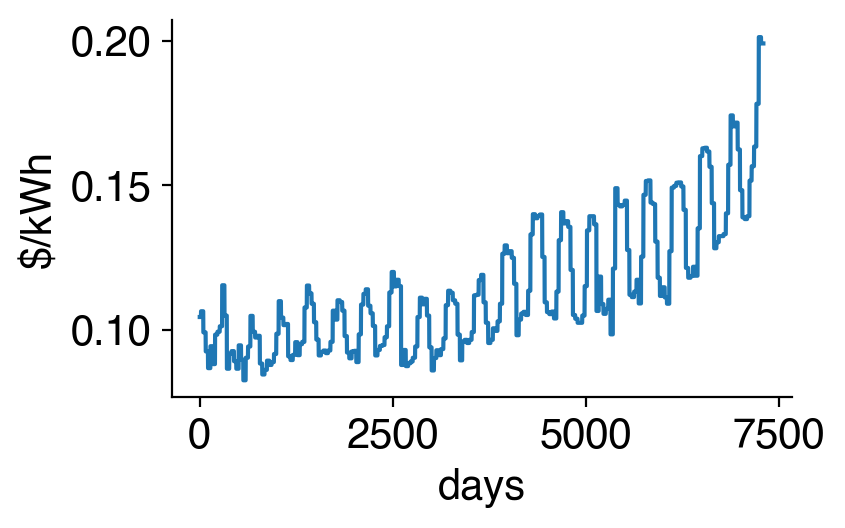

In [53]:
retail_price_data = pd.read_csv(
    'Average_retail_price_of_electricity_monthly.csv', skiprows=4)

target_state = 'California'  # 'United States' or string of the state name
# 'all sectors', 'residential', 'commercial', 'industrial', 'transportation', 'other'
sector = 'industrial'

retail_price_daily = []
treated_months = []

for i, month in enumerate(retail_price_data['Month']):
    if month not in treated_months:
        retail_price_daily += number_days(month)*[list(retail_price_data[target_state + ' ' +
                                                                         sector+' cents per kilowatthour'][retail_price_data['Month'] == month])[0]]
    treated_months.append(month)

electricity_retail_price_daily = np.flip(retail_price_daily)[-sim_time_d:]/100
plt.plot(electricity_retail_price_daily)
plt.xlabel("days")
plt.ylabel("$/kWh")
plt.show()


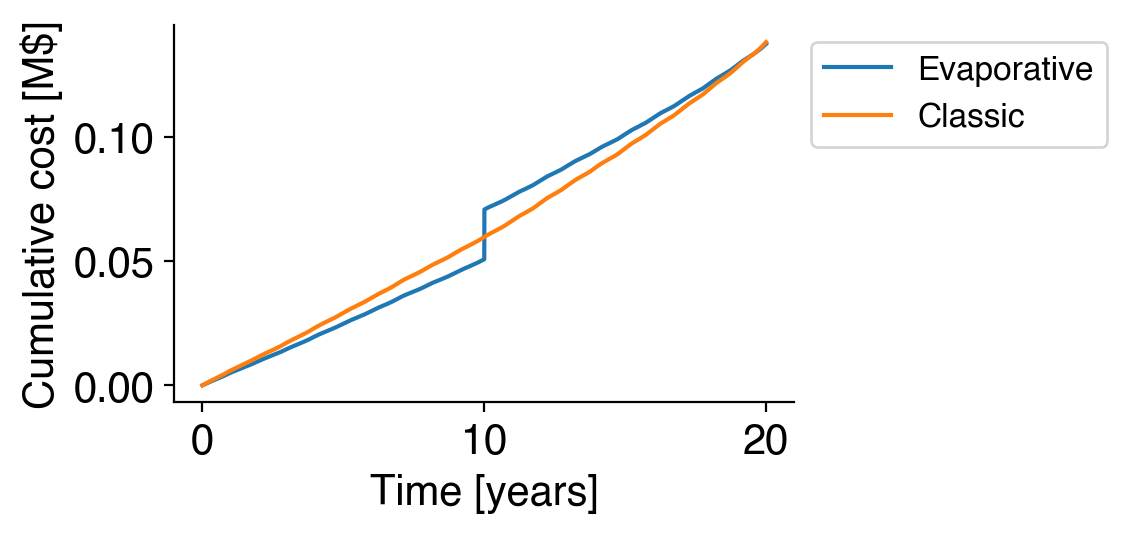

In [65]:
rack_consumption = 3  # kWh
n_rack = 46  # number of racks in the data center
IT_load = n_rack * rack_consumption

case_name = ['Evaporative', 'Classic']
PUE = [1.02, 1.2]
lifetime_d = [int(sim_time_d/2+1), sim_time_d+1]
capital_cost_per_renewal = [20000, 300000]

n_case = len(case_name)
capital_cost_d = np.zeros((n_case, time_days.size))
op_cost_d = np.zeros((n_case, time_days.size))
total_cost_d = np.zeros((n_case, time_days.size))

for case in range(n_case):
    for i, time in enumerate(time_days):
        if time % lifetime_d[case] == 0:
            capital_cost_d[case][i] += capital_cost_per_renewal[case]
        IT_cost = IT_load * electricity_retail_price_daily[i]
        cooling_cost_evap = (PUE[case]-1) * IT_load * \
            electricity_retail_price_daily[i]
        op_cost_d[case][i] = IT_cost + cooling_cost_evap
    total_cost_d[case] = capital_cost_d[case] + op_cost_d[case]
    plt.plot(time_days/365,
             np.cumsum(total_cost_d[case])/1e6, label=case_name[case])

plt.xlabel('Time [years]')
plt.ylabel('Cumulative cost [M$]')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


In [75]:
def custom_parser(string, type):
    if ',' in string:
        str_list = string.split(',')
        l = []
        for el in str_list:
            if type == 'str':
                l.append(el)
            elif type == 'int':
                l.append(int(el))
            elif type == 'float':
                l.append(float(el))
        return l
    else:
        if type == 'str':
            return [string]
        elif type == 'int':
            return [int(string)]
        elif type == 'float':
            return [float(string)]


custom_parser('2.', 'float')

[2.0]

In [6]:
t = np.linspace(0, 25*365, 25*365+1)
hours = np.random.normal(loc=23.9, scale=1, size=t.size)
for i, k in enumerate(hours):
    hours[i] = min(max(k,0), 24)
hours_df = pd.DataFrame(data={"days":t, "hours":hours})
hours_df.to_csv('./Activity_hours_daily.csv', sep=',', index=False)

23.550643941048357


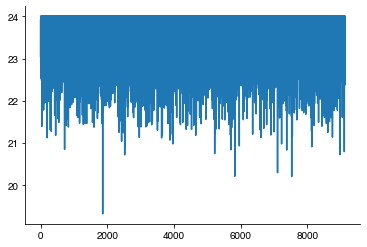

In [8]:
plt.plot(pd.read_csv("activity_hours_daily.csv")['days'], pd.read_csv("activity_hours_daily.csv")['hours'])
print(np.mean(pd.read_csv("activity_hours_daily.csv")['hours']))